In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from keras.models import Sequential

In [3]:
data_dir = 'C:/Users/amad_/makeaiwork2/projects/apple_disease_classification/data/Train'

import tensorflow as tf

img_height = 360
img_width = 360
batch_size = 32

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

train_label = train_ds.class_names

Found 382 files belonging to 4 classes.
Using 306 files for training.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_label = val_ds.class_names

Found 382 files belonging to 4 classes.
Using 76 files for validation.


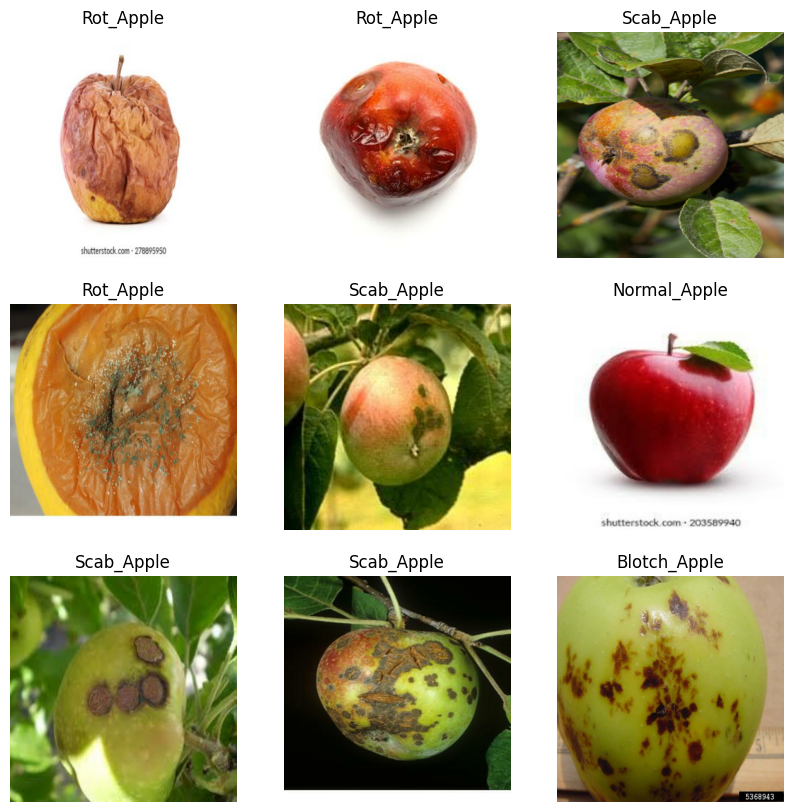

In [6]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")


<h1> Amad </h1>

In [7]:
#sets
print(train_label)
print(val_label)

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']
['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']
(32, 360, 360, 3)
(32,)


In [8]:
#Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
#Standardize the data
#normalization_layer = layers.Rescaling(1./255)

In [10]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 360, 360, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 360, 360, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 180, 180, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        1

In [13]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
10/10 [==============================] - 37s 3s/step - loss: 3.3302 - accuracy: 0.2386 - val_loss: 1.3069 - val_accuracy: 0.3947
Epoch 2/10
10/10 [==============================] - 27s 3s/step - loss: 1.2470 - accuracy: 0.4706 - val_loss: 1.1554 - val_accuracy: 0.5132
Epoch 3/10
10/10 [==============================] - 27s 3s/step - loss: 1.0077 - accuracy: 0.6340 - val_loss: 0.9619 - val_accuracy: 0.5921
Epoch 4/10
10/10 [==============================] - 31s 3s/step - loss: 0.7393 - accuracy: 0.7255 - val_loss: 0.8080 - val_accuracy: 0.6447
Epoch 5/10
10/10 [==============================] - 32s 3s/step - loss: 0.4781 - accuracy: 0.8235 - val_loss: 0.7555 - val_accuracy: 0.6711
Epoch 6/10
10/10 [==============================] - 32s 3s/step - loss: 0.3684 - accuracy: 0.8758 - val_loss: 0.7569 - val_accuracy: 0.7237
Epoch 7/10
10/10 [==============================] - 31s 3s/step - loss: 0.2208 - accuracy: 0.9183 - val_loss: 0.8125 - val_accuracy: 0.7368
Epoch 8/10
10/10 [==

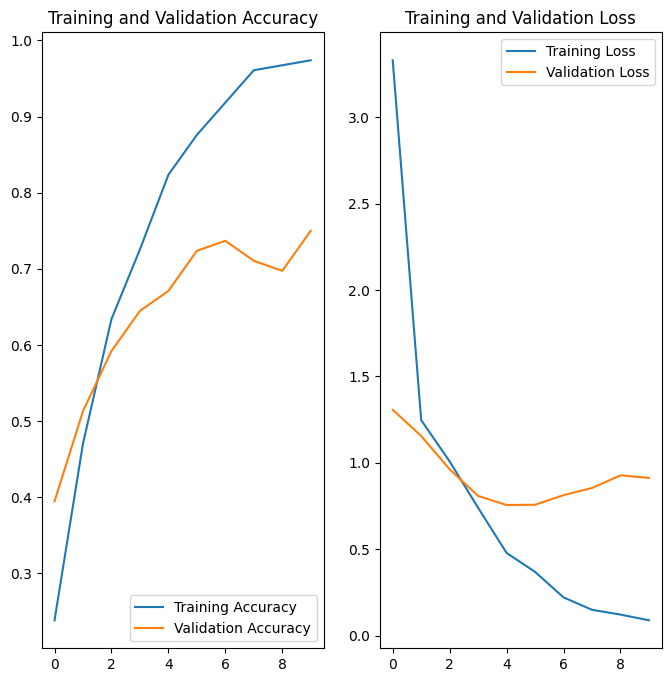

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [1]:
test_data_dir = 'C:/Users/amad_/makeaiwork2/projects/apple_disease_classification/data/Test'


test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    seed=123,
    image_size=(img_height, img_width),
    shuffle = False,
    batch_size=batch_size)




test_label = test_ds.class_names
print(test_label)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

batchPredictions = model.predict(train_ds)
predicted_categories = tf.argmax(batchPredictions, axis=1)
true_categories = tf.concat([y for x, y in train_ds], axis=0)

# confusion_matrix(predicted_categories, true_categories)




confusion_matrix = confusion_matrix(true_categories, predicted_categories)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = ['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple'])


cm_display.plot()
plt.show()

NameError: name 'tf' is not defined

In [15]:
#Data aug
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


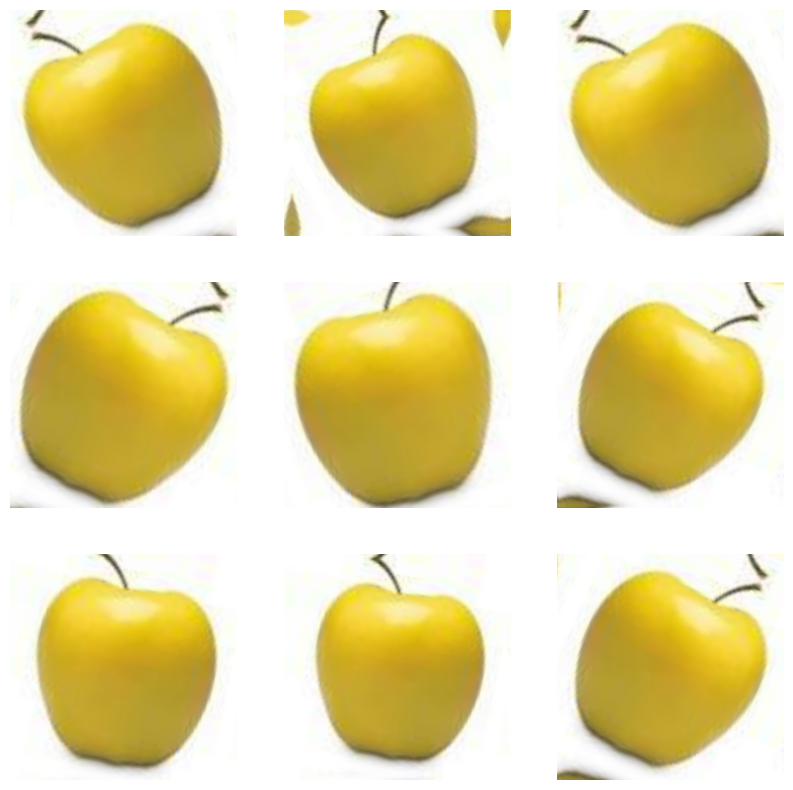

In [16]:
# Visualize a few augmented examples 
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [17]:
#Dropout
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [18]:
# Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 360, 360, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 360, 360, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 360, 360, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 180, 180, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                  

In [20]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
10/10 [==============================] - 38s 4s/step - loss: 3.5763 - accuracy: 0.2614 - val_loss: 1.2929 - val_accuracy: 0.2763
Epoch 2/15
10/10 [==============================] - 38s 4s/step - loss: 1.1517 - accuracy: 0.4706 - val_loss: 1.0236 - val_accuracy: 0.5263
Epoch 3/15
10/10 [==============================] - 37s 4s/step - loss: 1.0081 - accuracy: 0.6242 - val_loss: 0.8732 - val_accuracy: 0.5921
Epoch 4/15
10/10 [==============================] - 38s 4s/step - loss: 0.9171 - accuracy: 0.6667 - val_loss: 0.8646 - val_accuracy: 0.6184
Epoch 5/15
10/10 [==============================] - 38s 4s/step - loss: 0.8315 - accuracy: 0.6765 - val_loss: 0.8657 - val_accuracy: 0.6316
Epoch 6/15
10/10 [==============================] - 39s 4s/step - loss: 0.7758 - accuracy: 0.7255 - val_loss: 0.8140 - val_accuracy: 0.6711
Epoch 7/15
10/10 [==============================] - 39s 4s/step - loss: 0.7299 - accuracy: 0.7418 - val_loss: 0.8529 - val_accuracy: 0.6711
Epoch 8/15
10/10 [==

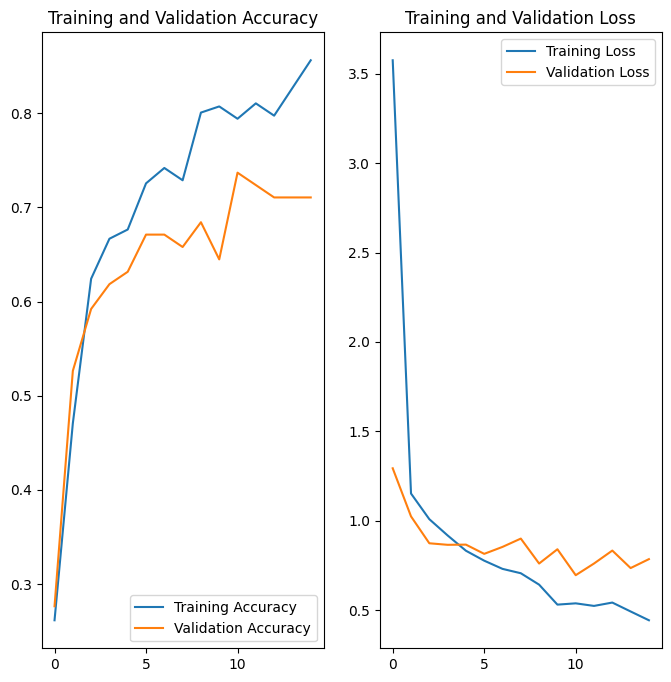

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [45]:
import numpy as np
import tkinter as tk
from tkinter import simpledialog

link = simpledialog.askstring(title="Test",
                                  prompt="link:")
image_url = f"{link}"
ind_link = link.rfind('/') +1


url_str = image_url[ind_link:(len(image_url))]


image_path = tf.keras.utils.get_file(url_str, origin=link)

img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

24576/11574 [===============================================================] - 0s 0us/step
This image most likely belongs to Normal_Apple with a 99.94 percent confidence.


In [27]:
test_data_dir = 'C:/Users/amad_/makeaiwork2/projects/apple_disease_classification/data/Train'


test_ds = tf.keras.utils.image_dataset_from_directory(

    test_data_dir,

    seed=123,

    image_size=(img_height, img_width),

    batch_size=batch_size)



test_label = test_ds.class_names

print(test_label)

Found 382 files belonging to 4 classes.
['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']


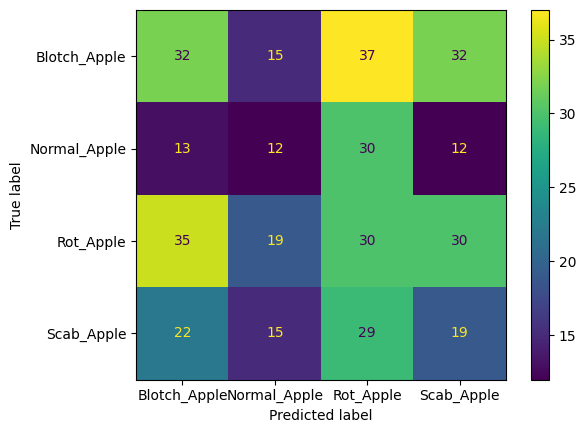

In [28]:
test_data_dir = 'C:/Users/amad_/makeaiwork2/projects/apple_disease_classification/data/Train'


test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)



test_label = test_ds.class_names
print(test_label)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

batchPredictions = model.predict(test_ds)
predicted_categories = tf.argmax(batchPredictions, axis=1)
true_categories = tf.concat([y for x, y in test_ds], axis=0)

# confusion_matrix(predicted_categories, true_categories)




confusion_matrix = confusion_matrix(true_categories, predicted_categories)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = ['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple'])


cm_display.plot()
plt.show()